In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
pylab.rcParams['figure.figsize'] = (8.0, 8.0)
pylab.rcParams.update({'font.size': 20})
pylab.rcParams['text.usetex'] = False
pylab.rcParams.update({'mathtext.default': 'regular' })



In [10]:
N=50000
lorenz_attractor_dx = []
lorenz_attractor_dy = []
lorenz_attractor_dz = []

sigma = 10 
r = 28
b = 8 / float(3)

x0 = 0
y0 = -0.01
z0 = 9
h = 0.01

lorenz_attractor_dx.append(x0)
lorenz_attractor_dy.append(y0)
lorenz_attractor_dz.append(z0)
for i in range(N - 1):
    x1 = x0 + h * sigma * (y0 - x0)
    y1 = y0 + h * (-x0 * z0 + r * x0 - y0)
    z1 = z0 + h * (x0 * y0 - b * z0)
    lorenz_attractor_dx.append(x1)
    lorenz_attractor_dy.append(y1)
    lorenz_attractor_dz.append(z1)
    x0 = x1
    y0 = y1 
    z0 = z1

In [11]:
from NearestNeighborsModule.DelayVectorDB import DelayVectorDB 



In [12]:
dvdb = DelayVectorDB(np.array(lorenz_attractor_dx), 3, 8)

In [13]:
X, y = dvdb.get_vectors()

In [14]:
from mpl_toolkits.mplot3d import Axes3D



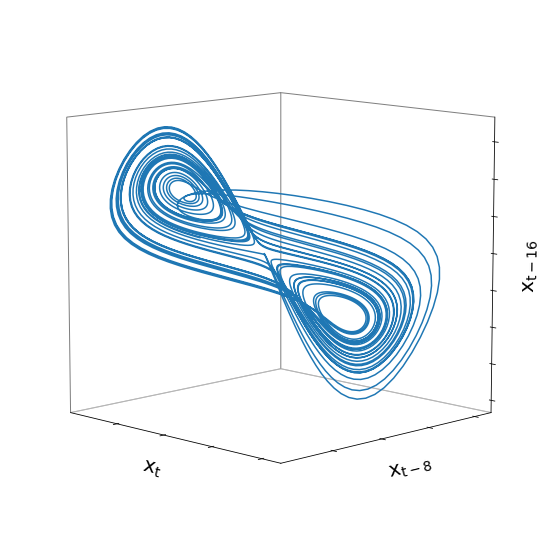

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data_points = 4000
# Get rid of colored axes planes
# First remove fill
ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.plot(X[:data_points][:, 0], X[:data_points][:, 1], X[:data_points][:, 2])
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
frame1.axes.zaxis.set_ticklabels([])

ax.view_init(elev=10, azim=135)
ax.set_xlabel(r'$x_{t}$')
ax.set_ylabel(r'$x_{t - 8}$')
ax.set_zlabel(r'$x_{t - 16}$')
plt.tight_layout()
#ax.xaxis.set_tick_params(labelsize=10)
#ax.yaxis.set_tick_params(labelsize=10)
#ax.zaxis.set_tick_params(labelsize=10)
#plt.title('Lorenz Attractor')
savefig('/Users/rafa/Dropbox/My papers/Tesis/figures/chapter2/{}.eps'.format('lorenz_reconstruction'))

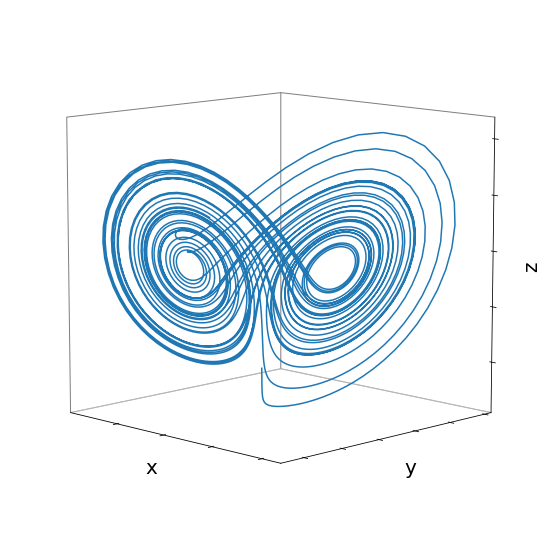

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data_points = 4000
# Get rid of colored axes planes
# First remove fill
ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.plot(lorenz_attractor_dx[:data_points], lorenz_attractor_dy[:data_points], lorenz_attractor_dz[:data_points])
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
frame1.axes.zaxis.set_ticklabels([])

ax.view_init(elev=10, azim=135)
#ax.xaxis.set_tick_params(labelsize=10)
#ax.yaxis.set_tick_params(labelsize=10)
#ax.zaxis.set_tick_params(labelsize=10)
#plt.title('Lorenz Attractor')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z', rotation=90)
plt.tight_layout()
savefig('/Users/rafa/Dropbox/My papers/Tesis/figures/chapter2/{}.eps'.format('lorenz_attractor'))
